In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
datasets=pd.read_csv("Diabetes_prediction.csv")

In [9]:
datasets


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,2,115.863387,56.410731,24.336736,94.385783,26.455940,0.272682,20.100494,0
1,2,92.490122,70.615520,23.443591,138.652426,23.910167,0.665160,44.912281,0
2,1,88.141469,63.262618,23.404364,149.358082,21.948250,0.676022,48.247873,1
3,2,108.453101,67.793632,20.751580,108.751638,24.209304,0.289636,42.749868,0
4,1,127.849443,94.725685,22.603078,25.269987,32.997477,0.601315,32.797789,0
...,...,...,...,...,...,...,...,...,...
995,1,103.496355,41.059401,24.930299,43.675978,25.846062,0.455884,19.905419,0
996,1,60.714150,64.082842,24.689064,111.562745,19.464280,0.250560,44.421874,1
997,0,97.597727,64.122312,22.140339,108.138552,22.733052,0.761463,58.949800,1
998,0,66.775137,55.908797,24.885274,219.521484,31.819187,0.382877,46.928923,0


In [11]:
datasets.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   int64  
 1   Glucose                   1000 non-null   float64
 2   BloodPressure             1000 non-null   float64
 3   SkinThickness             1000 non-null   float64
 4   Insulin                   1000 non-null   float64
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   float64
 8   Diagnosis                 1000 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 70.4 KB


In [14]:
datasets.isnull().sum() #there is no null char

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diagnosis                   0
dtype: int64

In [17]:
datasets.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1.771000,99.440607,72.179837,23.278316,84.582679,25.433600,0.449383,43.281798,0.30600
std,1.354398,19.470730,13.882017,1.173807,74.872733,3.690223,0.199334,14.465398,0.46106
min,0.000000,30.571402,31.401487,19.369987,-165.310033,13.548818,0.100037,-0.979804,0.00000
25%,1.000000,86.145927,62.795447,22.501591,35.076535,23.022715,0.283376,33.518451,0.00000
50%,2.000000,99.458362,71.909588,23.275225,84.442232,25.455649,0.448219,43.634273,0.00000
75%,3.000000,113.264556,82.082660,24.052022,134.267842,27.972184,0.619158,53.098446,1.00000
max,8.000000,161.238939,110.723715,26.917654,317.701852,36.324598,0.799654,90.573782,1.00000


In [18]:
features=["Glucose","BloodPressure","SkinThickness","BMI"]

In [28]:
for f in features:
    print(f"{f} has {(datasets[f]==0).mean()*100}% of invalid data")

Glucose has 0.0% of invalid data
BloodPressure has 0.0% of invalid data
SkinThickness has 0.0% of invalid data
BMI has 0.0% of invalid data


In [29]:
#if any feature has many 0

In [30]:
#dataset.drop("Insulin",axis=1)

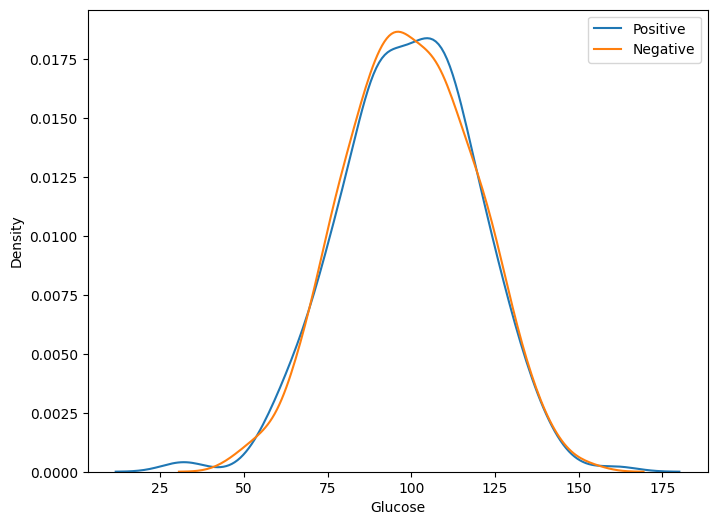

In [37]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=datasets["Glucose"][datasets["Diagnosis"]==1])
sns.kdeplot(data=datasets["Glucose"][datasets["Diagnosis"]==0])
plt.legend(["Positive","Negative"])
plt.show()

In [43]:
x=datasets.drop(["Diagnosis"],axis=1)
y=datasets["Diagnosis"]

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [47]:
#Building  ML model 

In [50]:
from sklearn.metrics import confusion_matrix

In [49]:
#we can use (LogisticRegression(), …) (KNeighborsClassifier(), …)(DecisionTreeClassifier(), …)

In [56]:
def run_model(model,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f"Training Accuracy:{model.score(x_train,y_train)}.\nTesting Accuracy:{model.score(x_test,y_test)}.")
    plt.figure(figsize=(3,3))
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="Blues")
    plt.show()

Training Accuracy:0.688.
Testing Accuracy:0.712.


C:\Users\sahil\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


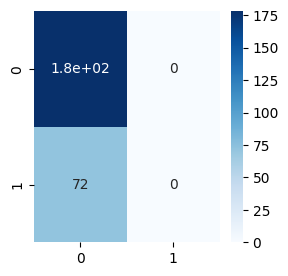

In [59]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
run_model(lr)

In [60]:
from sklearn.neighbors import KNeighborsClassifier



Neighbours1
Training Accuracy:1.0.
Testing Accuracy:0.596.


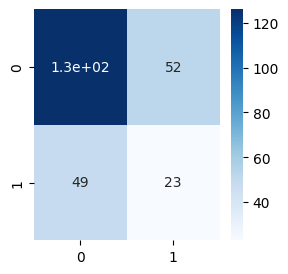



Neighbours2
Training Accuracy:0.7946666666666666.
Testing Accuracy:0.676.


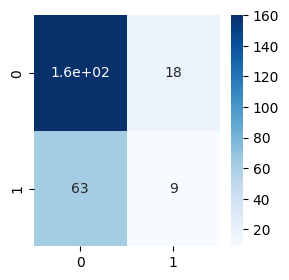



Neighbours3
Training Accuracy:0.7826666666666666.
Testing Accuracy:0.604.


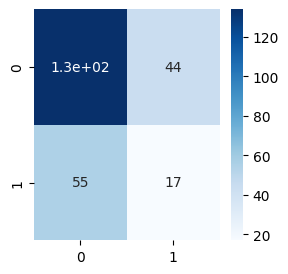



Neighbours4
Training Accuracy:0.7293333333333333.
Testing Accuracy:0.668.


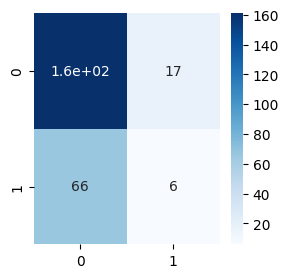



Neighbours5
Training Accuracy:0.74.
Testing Accuracy:0.648.


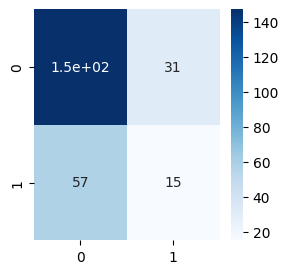



Neighbours6
Training Accuracy:0.716.
Testing Accuracy:0.688.


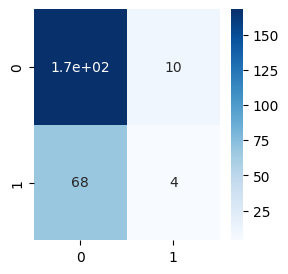



Neighbours7
Training Accuracy:0.7226666666666667.
Testing Accuracy:0.664.


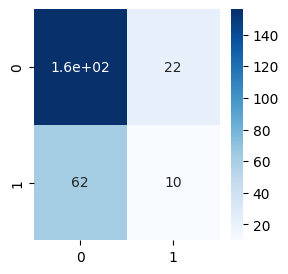



Neighbours8
Training Accuracy:0.7026666666666667.
Testing Accuracy:0.704.


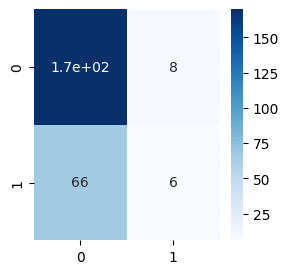



Neighbours9
Training Accuracy:0.708.
Testing Accuracy:0.684.


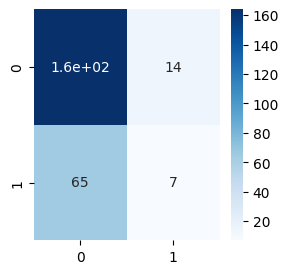



Neighbours10
Training Accuracy:0.7026666666666667.
Testing Accuracy:0.704.


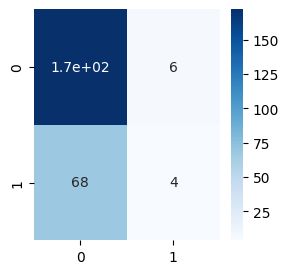



Neighbours11
Training Accuracy:0.704.
Testing Accuracy:0.692.


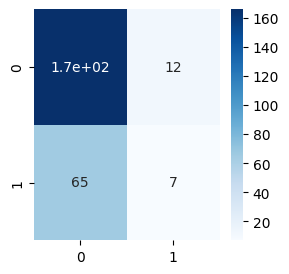



Neighbours12
Training Accuracy:0.7.
Testing Accuracy:0.696.


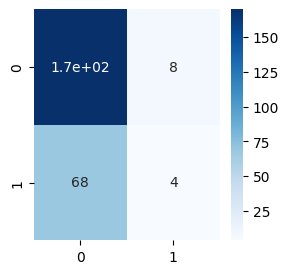



Neighbours13
Training Accuracy:0.7.
Testing Accuracy:0.696.


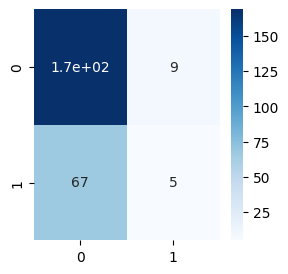



Neighbours14
Training Accuracy:0.6946666666666667.
Testing Accuracy:0.7.


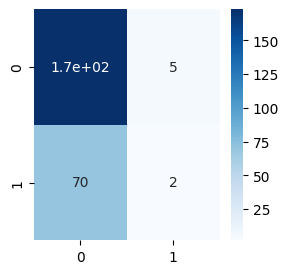



Neighbours15
Training Accuracy:0.6906666666666667.
Testing Accuracy:0.692.


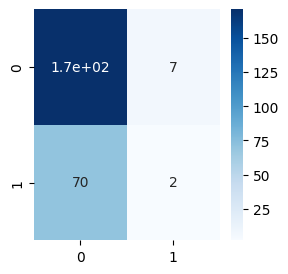



Neighbours16
Training Accuracy:0.692.
Testing Accuracy:0.708.


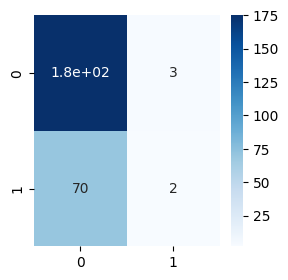



Neighbours17
Training Accuracy:0.6933333333333334.
Testing Accuracy:0.696.


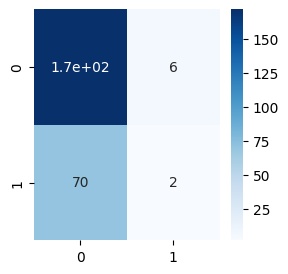



Neighbours18
Training Accuracy:0.692.
Testing Accuracy:0.712.


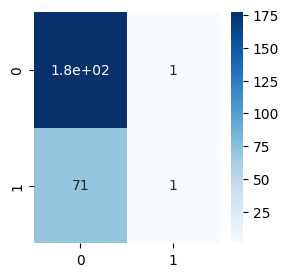



Neighbours19
Training Accuracy:0.696.
Testing Accuracy:0.704.


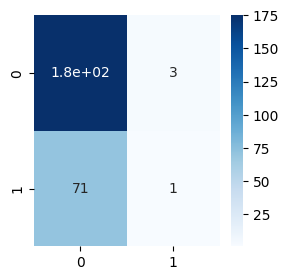



Neighbours20
Training Accuracy:0.6933333333333334.
Testing Accuracy:0.712.


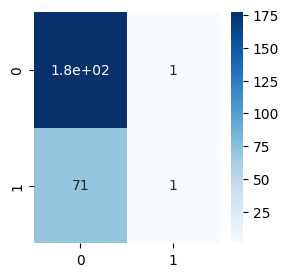

In [62]:
for n in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=n)
    print(f"\n\nNeighbours{n}")
    run_model(knn)

In [63]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# 1. Define Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 2. Define all models with their parameter grids
models = {
    "Logistic Regression": (
        Pipeline([("scaler", StandardScaler()), ("clf", LogisticRegression(max_iter=1000))]),
        {"clf__C": [0.01, 0.1, 1, 10]}
    ),
    "SVM (RBF)": (
        Pipeline([("scaler", StandardScaler()), ("clf", SVC())]),
        {"clf__C": [0.1, 1, 10], "clf__kernel": ["rbf"]}
    ),
    "Random Forest": (
        RandomForestClassifier(random_state=42),
        {"n_estimators": [100, 200], "max_depth": [None, 5, 10]}
    ),
    "Gradient Boosting": (
        GradientBoostingClassifier(random_state=42),
        {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1]}
    ),
    "KNN": (
        Pipeline([("scaler", StandardScaler()), ("clf", KNeighborsClassifier())]),
        {"clf__n_neighbors": [3, 5, 7, 9]}
    ),
    "Naive Bayes": (GaussianNB(), {}),
    "Decision Tree": (DecisionTreeClassifier(random_state=42), {"max_depth": [3, 5, 10]})
}

# 3. Execute CV and store results
cv_results_summary = {}
print("Cross-Validation Accuracy Scores:\n")

for name, (model, params) in models.items():
    grid = GridSearchCV(
        estimator=model,
        param_grid=params,
        cv=cv,
        scoring="accuracy",
        n_jobs=-1
    )
    grid.fit(X_train, y_train)
    
    # Extract mean and std for the best version of this model
    mean_score = grid.cv_results_['mean_test_score'][grid.best_index_]
    std_score = grid.cv_results_['std_test_score'][grid.best_index_]
    
    cv_results_summary[name] = mean_score
    print(f"{name:<20} : {mean_score:.4f} ± {std_score:.4f}")

# 4. Final print statement for the best model
best_model_name = max(cv_results_summary, key=cv_results_summary.get)
print(f"\nBest CV Model:")
print(f"{best_model_name} -> {cv_results_summary[best_model_name]:.4f}")

Cross-Validation Accuracy Scores:



NameError: name 'X_train' is not defined

In [64]:
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# 1. Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 2. Pipelines + parameter grids for all models
models = {
    "Logistic Regression": (
        Pipeline([("scaler", StandardScaler()), ("clf", LogisticRegression(max_iter=1000))]),
        {"clf__C": [0.01, 0.1, 1, 10], "clf__penalty": ["l2"], "clf__solver": ["lbfgs"]}
    ),
    "SVM (RBF)": (
        Pipeline([("scaler", StandardScaler()), ("clf", SVC())]),
        {"clf__C": [0.1, 1, 10], "clf__kernel": ["rbf", "linear"], "clf__gamma": ["scale", "auto"]}
    ),
    "Random Forest": (
        RandomForestClassifier(random_state=42),
        {
            "n_estimators": [100, 200], 
            "max_depth": [None, 5, 10], 
            "min_samples_split": [2, 5], 
            "min_samples_leaf": [1, 2]
        }
    ),
    "Gradient Boosting": (
        GradientBoostingClassifier(random_state=42),
        {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1]}
    ),
    "KNN": (
        Pipeline([("scaler", StandardScaler()), ("clf", KNeighborsClassifier())]),
        {"clf__n_neighbors": [3, 5, 7, 9], "clf__weights": ["uniform", "distance"], "clf__metric": ["euclidean", "manhattan"]}
    ),
    "Naive Bayes": (GaussianNB(), {}),
    "Decision Tree": (DecisionTreeClassifier(random_state=42), {"max_depth": [3, 5, 10]})
}

# 3. Execution and formatted output
results = {}
print("Cross-Validation Accuracy Scores:\n")

for name, (model, params) in models.items():
    grid = GridSearchCV(
        estimator=model,
        param_grid=params,
        cv=cv,
        scoring="accuracy",
        n_jobs=-1
    )
    
    # Using lowercase x_train and y_train
    grid.fit(x_train, y_train)
    
    mean_score = grid.best_score_
    std_score = grid.cv_results_['std_test_score'][grid.best_index_]
    
    results[name] = mean_score
    print(f"{name:<20} : {mean_score:.4f} ± {std_score:.4f}")

# 4. Final summary statement
best_model = max(results, key=results.get)

print(f"\nBest CV Model:")
print(f"{best_model} -> {results[best_model]:.4f}")
print(f"this model is best: {best_model}")

Cross-Validation Accuracy Scores:



C:\Users\sahil\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


Logistic Regression  : 0.6880 ± 0.0027
SVM (RBF)            : 0.6880 ± 0.0027
Random Forest        : 0.6880 ± 0.0027
Gradient Boosting    : 0.6867 ± 0.0042
KNN                  : 0.6720 ± 0.0229
Naive Bayes          : 0.6827 ± 0.0155
Decision Tree        : 0.6573 ± 0.0150

Best CV Model:
Logistic Regression -> 0.6880
this model is best: Logistic Regression
